Output()

Output()

1 Day Retention Posterior:
7 Day Retention Posterior: 
The probability that testCase improves 1 day retention: 0.04
The probability testCase improves 7 day retention: 0.00
The probability testCase reduces 1 day retention: 0.96
the probability testCase reduces 7 day retention: 1.00


array([<Axes: title={'center': 'p_control'}>,
       <Axes: title={'center': 'p_testCase'}>,
       <Axes: title={'center': 'diff'}>], dtype=object)

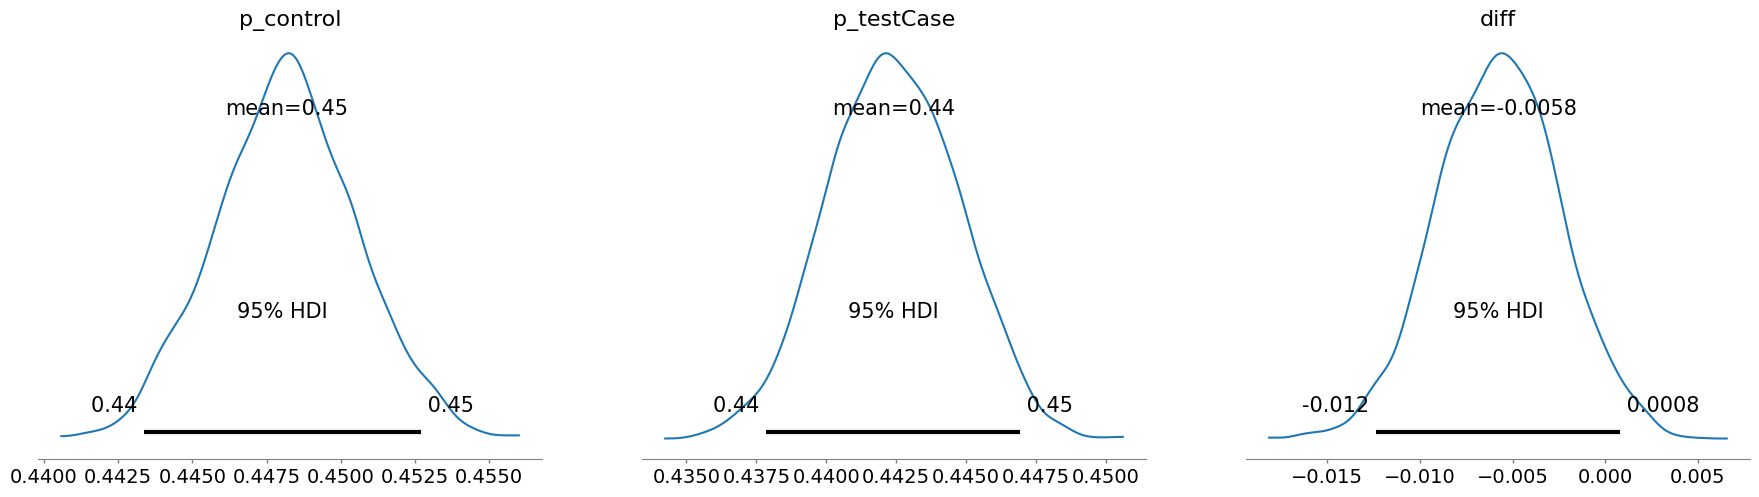

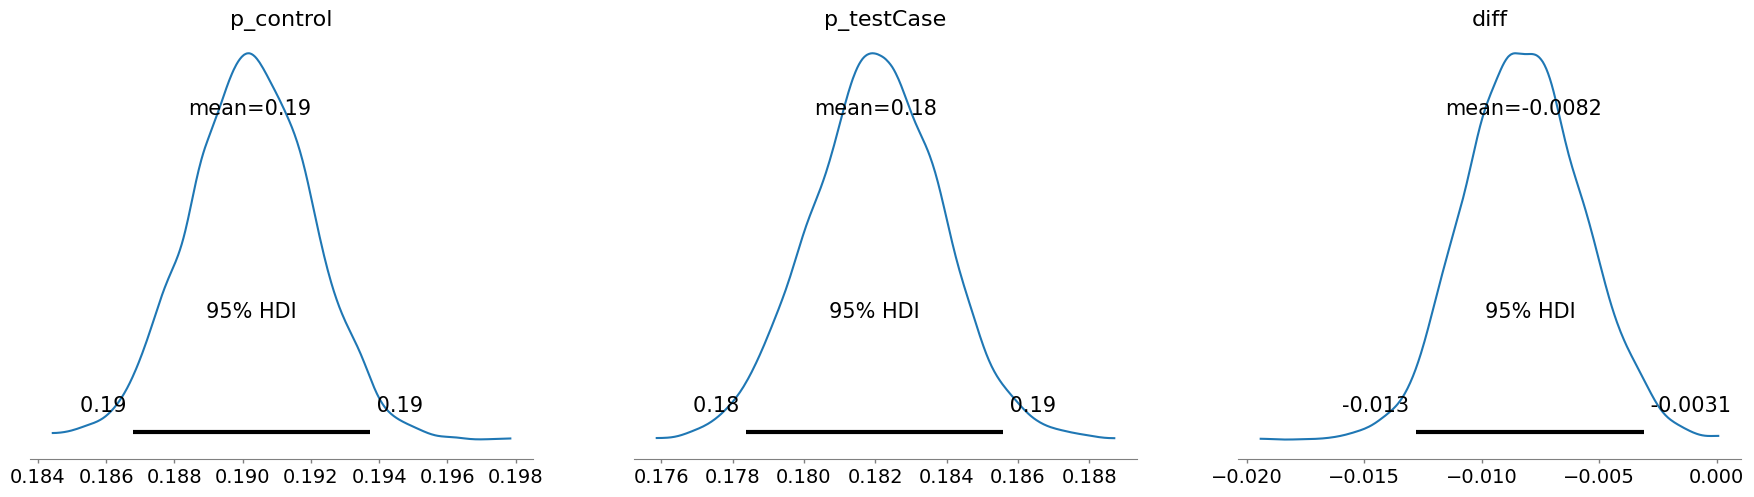

In [3]:
!pip install pymc arviz

import pymc as pm
import arviz as az
import pandas as pd
import numpy as np


df = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")

# Split groups
control = df[df["version"] == "gate_30"]
testCase = df[df["version"] == "gate_40"]

# Count successes & totals for each retention metric
def get_counts(col):
    return (control[col].sum(), len(control)), (testCase[col].sum(), len(testCase))

# Model 1 for 1 day retention
(control_s1, control_n1), (test_s1, test_n1) = get_counts("retention_1")

with pm.Model() as model_ret1:

    # Priors
    p_control = pm.Beta("p_control", alpha=1, beta=1)
    p_testCase = pm.Beta("p_testCase", alpha=1, beta=1)

    # Likelihood
    control_obs = pm.Binomial("control_obs", n=control_n1, p=p_control, observed=control_s1)
    test_obs = pm.Binomial("test_obs", n=test_n1, p=p_testCase, observed=test_s1)

    # Difference
    diff = pm.Deterministic("diff", p_testCase - p_control)

    trace_ret1 = pm.sample(2500, tune=1500, target_accept=0.95, progressbar=True)


# Model 2 for 7 day retention
(control_s7, control_n7), (test_s7, test_n7) = get_counts("retention_7")

with pm.Model() as model_ret7:

    p_control = pm.Beta("p_control", alpha=1, beta=1)
    p_testCase = pm.Beta("p_testCase", alpha=1, beta=1)

    control_obs = pm.Binomial("control_obs", n=control_n7, p=p_control, observed=control_s7)
    test_obs = pm.Binomial("test_obs", n=test_n7, p=p_testCase, observed=test_s7)

    diff = pm.Deterministic("diff", p_testCase - p_control)

    trace_ret7 = pm.sample(2500, tune=1500, target_accept=0.95, progressbar=True)

# Results
print("1 Day Retention Posterior:")
az.summary(trace_ret1, var_names=["p_control", "p_testCase", "diff"])

print("7 Day Retention Posterior: ")
az.summary(trace_ret7, var_names=["p_control", "p_testCase", "diff"])

# Conclusions (kinda)
p1 = (trace_ret1.posterior["diff"] > 0).mean()
p7 = (trace_ret7.posterior["diff"] > 0).mean()

print(f"The probability that testCase improves 1 day retention: {p1:.2f}")
print(f"The probability testCase improves 7 day retention: {p7:.2f}")

print(f"The probability testCase reduces 1 day retention: {(trace_ret1.posterior['diff'] < 0).mean():.2f}")
print(f"the probability testCase reduces 7 day retention: {(trace_ret7.posterior['diff'] < 0).mean():.2f}")
